Take Home Assignment 3

3.0 Install any dependencies if needed 


In [11]:
! pip install supervision
! pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
  Using cached supervision-0.25.1-py3-none-any.whl.metadata (14 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached scipy-1.15.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached supervision-0.25.1-py3-none-any.whl (181 kB)
Using ca


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached ultralytics-8.3.74-py3-none-any.whl.metadata (35 kB)
  Using cached numpy-2.1.1-cp313-cp313-win_amd64.whl.metadata (59 kB)
  Using cached torch-2.6.0-cp313-cp313-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.13.1


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
import supervision as sv

Matplotlib is building the font cache; this may take a moment.


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Piyumantha\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


3.1.1 Draw the segmentation mask of the largest car: Use ultralytics library only

In [9]:
img = cv2.imread("demo5_images/cars1.jpg")


0: 416x640 14 cars, 69.3ms
Speed: 2.9ms preprocess, 69.3ms inference, 9.2ms postprocess per image at shape (1, 3, 416, 640)


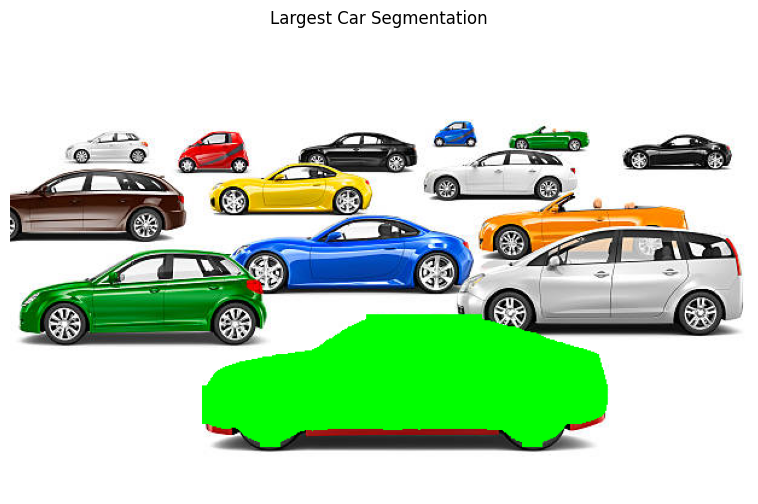

In [13]:
from ultralytics import YOLO
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

# Load the YOLO segmentation model (you can change it to a trained model if needed)
model = YOLO("yolo11n-seg.pt")

# Read the image
img = cv2.imread("demo5_images/cars1.jpg")

# Run the segmentation model
results = model(img)

# Initialize variables to track the largest car
largest_area = 0
largest_mask = None

# Iterate through detected objects
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes
    masks = result.masks.data.cpu().numpy()  # Segmentation masks
    classes = result.boxes.cls.cpu().numpy()  # Class IDs

    for i, (box, mask, cls) in enumerate(zip(boxes, masks, classes)):
        if int(cls) == 2:  # Class ID 2 corresponds to 'car' in COCO dataset
            x1, y1, x2, y2 = map(int, box)
            area = (x2 - x1) * (y2 - y1)
            
            if area > largest_area:
                largest_area = area
                largest_mask = mask

# Draw the segmentation mask if a car is found
if largest_mask is not None:
    mask = (largest_mask > 0.5).astype(np.uint8) * 255  # Convert to binary mask
    mask = cv2.resize(mask, (img.shape[1], img.shape[0]))   
    img[mask == 255] = [0, 255, 0]  # Apply green mask

# Convert image to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the result
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Largest Car Segmentation")
plt.show()

# Show the image with the largest car's mask
#cv2.imshow("Largest Car Segmentation", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

3.1.2 Draw the segmentation mask of the largest car : Use ultralytics + supervision libraries

100%|██████████| 22.8M/22.8M [00:49<00:00, 484kB/s] 



0: 416x640 14 cars, 200.9ms
Speed: 2.6ms preprocess, 200.9ms inference, 10.3ms postprocess per image at shape (1, 3, 416, 640)


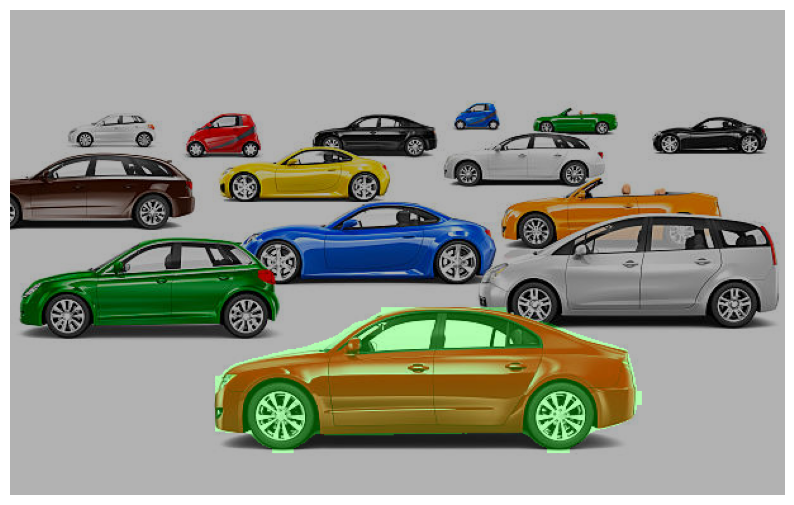

In [4]:
# Load the YOLOv8 segmentation model
model = YOLO("yolov8s-seg.pt")  # You can use 'yolov8m-seg.pt' or 'yolov8l-seg.pt' for better accuracy


# Ensure image is loaded correctly
if img is None:
    raise ValueError(f"Error: Could not load image at {img_path}")

# Convert BGR to RGB for displaying 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run the model on the image
results = model(img)

# Initialize variables to store the largest car mask
largest_area = 0
largest_mask = None

# Iterate through the detected objects
for result in results:
    for box, mask in zip(result.boxes.xyxy, result.masks.xy):
        x1, y1, x2, y2 = box  # Get bounding box coordinates
        area = (x2 - x1) * (y2 - y1)  # Compute area
        
        if area > largest_area:
            largest_area = area
            largest_mask = mask

# Draw the largest segmentation mask if found
if largest_mask is not None:
    mask_img = np.zeros_like(img_rgb, dtype=np.uint8)  # Create an empty mask image
    cv2.fillPoly(mask_img, [np.array(largest_mask, np.int32)], (0, 255, 0))  # Fill the mask with green color
    
    # Overlay mask on the original image
    output = cv2.addWeighted(img_rgb, 0.7, mask_img, 0.3, 0)
    
    # Display the output image in Colab
    plt.figure(figsize=(10, 10))
    plt.imshow(output)
    plt.axis("off")
    plt.show()

3.2 Estimate distance to centroid of chair 

Device set to use cpu



0: 384x640 1 chair, 47.5ms
Speed: 2.5ms preprocess, 47.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Estimated depth at centroid (352, 181): 140


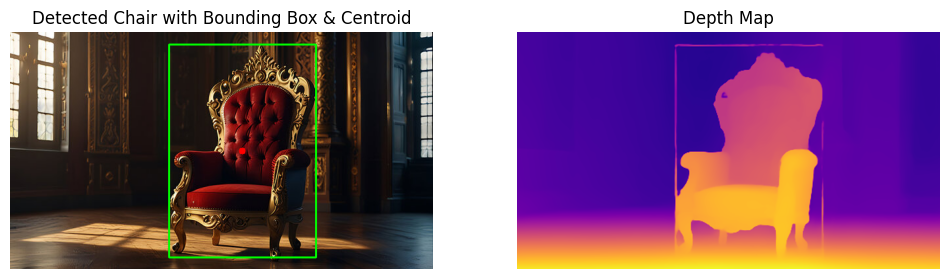

In [3]:
import torch
import cv2
import numpy as np
from ultralytics import YOLO  # Using YOLO for object detection
from transformers import pipeline  # For loading Hugging Face pipeline
from PIL import Image
import matplotlib.pyplot as plt

# Load the object detection model
model = YOLO("yolov8n.pt")  # You can replace with a more specific chair detection model

# Load the depth estimation model using Hugging Face pipeline
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

def detect_chair(image_path):
    image = cv2.imread(image_path)
    results = model(image)[0]

    for detection in results.boxes:
        class_id = int(detection.cls)
        if results.names[class_id] == "chair":
            x1, y1, x2, y2 = map(int, detection.xyxy[0])
            centroid_x = (x1 + x2) // 2
            centroid_y = (y1 + y2) // 2

            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

            # Draw centroid
            cv2.circle(image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)  # Red dot

            return image, (centroid_x, centroid_y), (x1, y1, x2, y2)

    return image, None, None

def get_depth_at_centroid(image, centroid):
    if centroid is None:
        print("No chair detected!")
        return None, None

    # Convert the image to RGB format (DepthAnything model might expect RGB format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert OpenCV image to PIL Image
    pil_image = Image.fromarray(image_rgb)

    # Get the depth map using Hugging Face pipeline
    depth_map_pil = pipe(pil_image)["depth"]

    # Convert PIL Image to numpy array for easy indexing
    depth_map = np.array(depth_map_pil)

    # Extract depth value at the centroid position
    depth_value = depth_map[centroid[1], centroid[0]]  # Access depth at centroid
    return depth_map, depth_value

# Main Execution
image_path = "demo5_images/kingChair.jpg"
image, centroid, bbox = detect_chair(image_path)

if centroid:
    depth_map, depth_value = get_depth_at_centroid(image, centroid)
    print(f"Estimated depth at centroid {centroid}: {depth_value}")

    # Plot the image and depth map
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image with bounding box and centroid
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax1.set_title('Detected Chair with Bounding Box & Centroid')
    ax1.axis('off')

    # Plot the depth map
    ax2.imshow(depth_map, cmap='plasma')  # Use a colormap for better visualization
    ax2.set_title('Depth Map')
    ax2.axis('off')

    # Display the plots
    plt.show()
else:
    print("Chair not detected in the image.")


3.3.1  Draw bounding boxes around the "cars" using supervision. 

In [6]:
# Downloads the video file from the google drive link, you'll have to "pip install gdown" first
import gdown

file_id = "1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4"
direct_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(direct_url, "vehicles_video.mp4", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4
To: c:\Users\Piyumantha\Desktop\UNIVERSITY\YEAR 04\SEM 02\Machine Vision Systems\Assignment\Assignment 03\ETM4272-main\vehicles_video.mp4
100%|██████████| 35.3M/35.3M [00:30<00:00, 1.15MB/s]


'vehicles_video.mp4'

In [9]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("yolo11n.pt")

# Define the callback function
def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)  # Run object detection on the frame
    detections = results[0]  # Get detections from the first frame

    # Create a supervision Detections object
    detections_sv = sv.Detections.from_ultralytics(detections)

    # Filter for "car" class (assuming class ID for car is 2, update if necessary)
    car_class_id = 2  # Check YOLO class mapping
    car_detections = detections_sv[detections_sv.class_id == car_class_id]

    # Annotate the frame with bounding boxes
    annotator = sv.BoxAnnotator()
    frame = annotator.annotate(scene=frame, detections=car_detections)

    return frame

# Process the video
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking.mp4",
    callback=callback
)



0: 384x640 3 cars, 1 truck, 71.1ms
Speed: 2.8ms preprocess, 71.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 77.7ms
Speed: 3.2ms preprocess, 77.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 57.5ms
Speed: 2.6ms preprocess, 57.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 137.9ms
Speed: 6.1ms preprocess, 137.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 67.8ms
Speed: 2.6ms preprocess, 67.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 58.9ms
Speed: 2.4ms preprocess, 58.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 58.2ms
Speed: 2.4ms preprocess, 58.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 54.8ms
Speed: 2.6ms preprocess, 54.8ms

3.3.1 Track the cars. Add the tracker id to the bounding boxes around the cars. Use supervision

In [10]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Initialize tracker and annotators
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Define class ID for "car" (check YOLO model class mappings if needed)
CAR_CLASS_ID = 2  # Adjust based on YOLO model class mapping

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    
    # Convert detections to supervision format
    detections = sv.Detections.from_ultralytics(results)
    
    # Filter for cars only
    car_detections = detections[detections.class_id == CAR_CLASS_ID]
    
    # Track the cars
    car_detections = tracker.update_with_detections(car_detections)

    # Generate labels with tracker IDs
    labels = [
        f"Car #{tracker_id}"
        for tracker_id in car_detections.tracker_id
    ]

    # Draw bounding boxes and labels
    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=car_detections
    )
    
    return label_annotator.annotate(
        annotated_frame, detections=car_detections, labels=labels
    )

# Process the video
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking_id.mp4",
    callback=callback
)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 3 cars, 1 truck, 99.9ms
Speed: 13.6ms preprocess, 99.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 85.5ms
Speed: 3.9ms preprocess, 85.5ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 59.9ms
Speed: 2.7ms preprocess, 59.9ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 101.1ms
Speed: 5.6ms preprocess, 101.1ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 94.6ms
Speed: 4.2ms preprocess, 94.6ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 truck, 92.3ms
Speed: 2.9ms preprocess, 92.3ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 78.1ms
Speed: 4.0ms preprocess, 78.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 98.7ms
Speed: 4.

3.3.2 Draw the track traces for the tracked cars. Use supervision

In [11]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Initialize tracker and annotators
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

# Define class ID for "car" (Check YOLO model class mappings)
CAR_CLASS_ID = 2  # Update if necessary

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    
    # Convert detections to supervision format
    detections = sv.Detections.from_ultralytics(results)
    
    # Filter detections to keep only cars
    car_detections = detections[detections.class_id == CAR_CLASS_ID]
    
    # Track the cars
    car_detections = tracker.update_with_detections(car_detections)

    # Generate labels with tracker IDs
    labels = [
        f"Car #{tracker_id}"
        for tracker_id in car_detections.tracker_id
    ]

    # Draw bounding boxes
    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=car_detections
    )
    
    # Add labels
    annotated_frame = label_annotator.annotate(
        annotated_frame, detections=car_detections, labels=labels
    )

    # Draw track traces
    return trace_annotator.annotate(
        annotated_frame, detections=car_detections
    )

# Process the video
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_track_traces.mp4",
    callback=callback
)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 3 cars, 1 truck, 83.4ms
Speed: 4.2ms preprocess, 83.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 54.1ms
Speed: 3.7ms preprocess, 54.1ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 43.0ms
Speed: 2.2ms preprocess, 43.0ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 90.2ms
Speed: 3.0ms preprocess, 90.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 67.7ms
Speed: 2.9ms preprocess, 67.7ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 truck, 70.7ms
Speed: 3.5ms preprocess, 70.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 112.2ms
Speed: 5.4ms preprocess, 112.2ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 57.1ms
Speed: 2.7

Questions:

Explain what "def callback(frame: np.ndarray, _: int) -> np.ndarray:" does. 

Answers: Complete this section

The `callback` function processes each frame of the video using object detection, tracking, and annotation. The function takes two parameters: `frame`, which is a NumPy array representing a single video frame, and `_`, an integer that serves as a placeholder for the frame index but is not used in the function. The function detects objects in the frame using a YOLO model, filters for cars, assigns tracker IDs, and annotates the frame with bounding boxes, labels, and movement traces. Finally, it returns the modified frame as a NumPy array, which is then used to generate the output video with visualized tracking information.